In [1]:
library(dplyr)
library(countrycode)
library(ggplot2)
library(repr)
library(readr)
options(repr.plot.width=6, repr.plot.height=4)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Exploring categorical data

In [2]:
# loading data
comics <- read.csv("comics.csv", stringsAsFactors = TRUE)
glimpse(comics)

Observations: 23,272
Variables: 11
$ name         <fct> Spider-Man (Peter Parker), Captain America (Steven Rog...
$ id           <fct> Secret, Public, Public, Public, No Dual, Public, Publi...
$ align        <fct> Good, Good, Neutral, Good, Good, Good, Good, Good, Neu...
$ eye          <fct> Hazel Eyes, Blue Eyes, Blue Eyes, Blue Eyes, Blue Eyes...
$ hair         <fct> Brown Hair, White Hair, Black Hair, Black Hair, Blond ...
$ gender       <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, ...
$ gsm          <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ alive        <fct> Living Characters, Living Characters, Living Character...
$ appearances  <int> 4043, 3360, 3061, 2961, 2258, 2255, 2072, 2017, 1955, ...
$ first_appear <fct> Aug-62, Mar-41, Oct-74, Mar-63, Nov-50, Nov-61, Nov-61...
$ publisher    <fct> marvel, marvel, marvel, marvel, marvel, marvel, marvel...


### contingency table review

In [3]:
# Check levels of align
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [4]:
# Check the levels of gender
levels(comics$gender)

[1] "Female" "Male"   "Other"

In [5]:
# Create a 2-way contingency table
table(comics$align, comics$gender)

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

### dropping levels
Removing levels which have low counts

In [6]:
# Remove align level
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()

# See the result
head(comics_filtered)

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


### side by side barchart

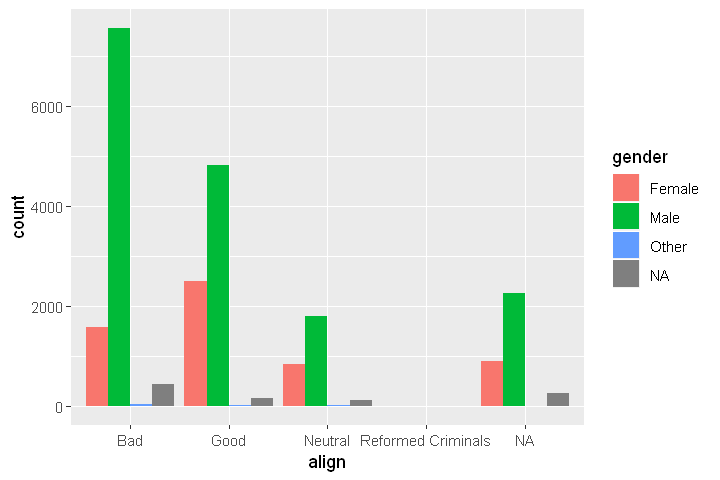

In [7]:
# Create side-by-side barchart of gender by alignment
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "dodge")

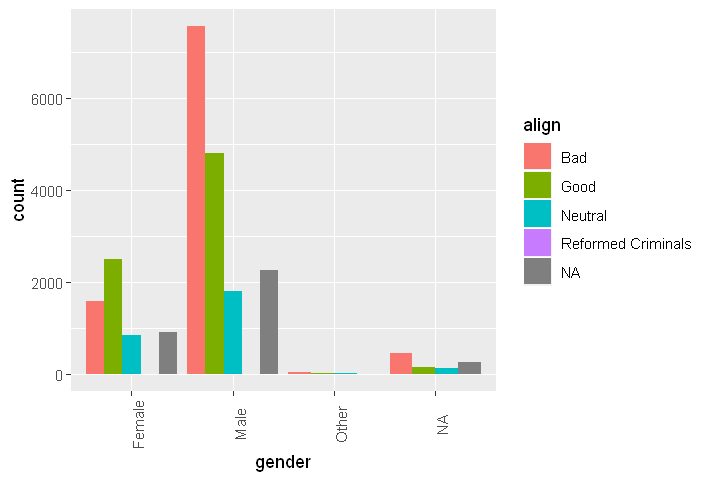

In [8]:
# Create side-by-side barchart of alignment by gender
ggplot(comics, aes(x = gender, fill = align)) + 
  geom_bar(position = "dodge") +
  theme(axis.text.x = element_text(angle = 90))

Among characters with "Neutral" alignment, males are the most common.
<br>In general, there is an association between gender and alignment.
<br>There are more male characters than female characters in this dataset.

### Conditional proportion

In [9]:
tab <- table(comics$align, comics$gender)
options(scipen = 999, digits = 3) # Print fewer digits
prop.table(tab)     # Joint proportions
prop.table(tab, 2)  # Conditional on columns

                    
                        Female      Male     Other
  Bad                0.0821968 0.3950985 0.0016722
  Good               0.1301144 0.2512933 0.0008883
  Neutral            0.0436850 0.0940064 0.0008883
  Reformed Criminals 0.0000523 0.0001045 0.0000000

                    
                       Female     Male    Other
  Bad                0.321020 0.533554 0.484848
  Good               0.508163 0.339355 0.257576
  Neutral            0.170612 0.126949 0.257576
  Reformed Criminals 0.000204 0.000141 0.000000

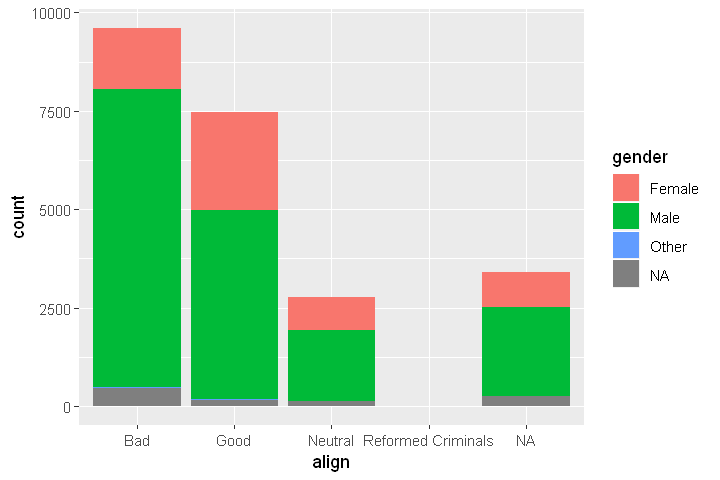

In [10]:
# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()
  

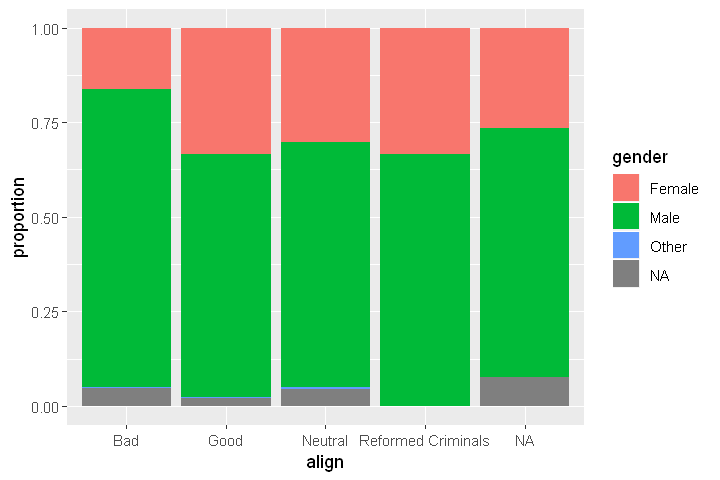

In [11]:
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

## Single variable exploration

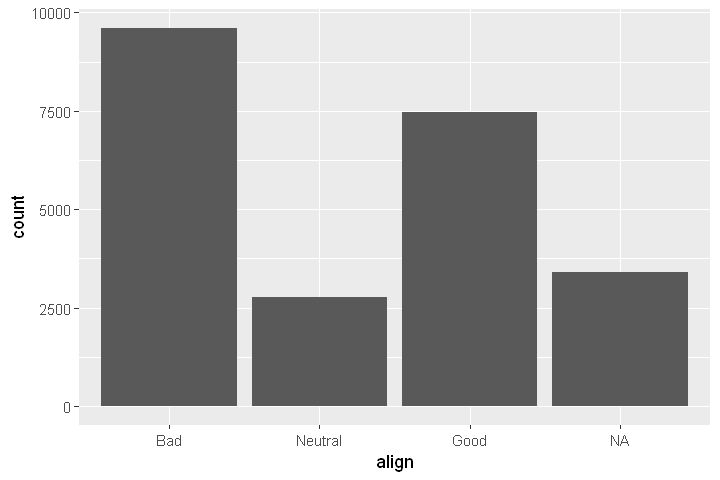

In [12]:
# Change the order of the levels in align
comics$align <- factor(comics$align, 
                       levels = c("Bad", "Neutral", "Good"))

# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

<b>Conditional barchart</b>

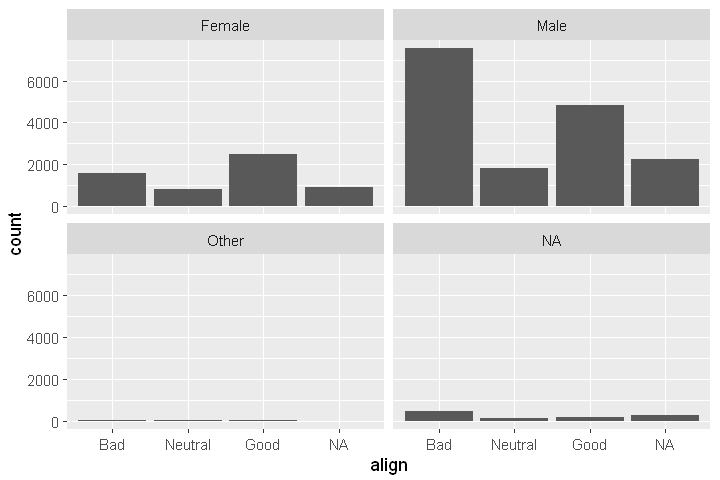

In [13]:
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align)) + 
  geom_bar() +
  facet_wrap(~ gender)

# Exploring numerical data

In [14]:
# Learn data structure
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


### faceted histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


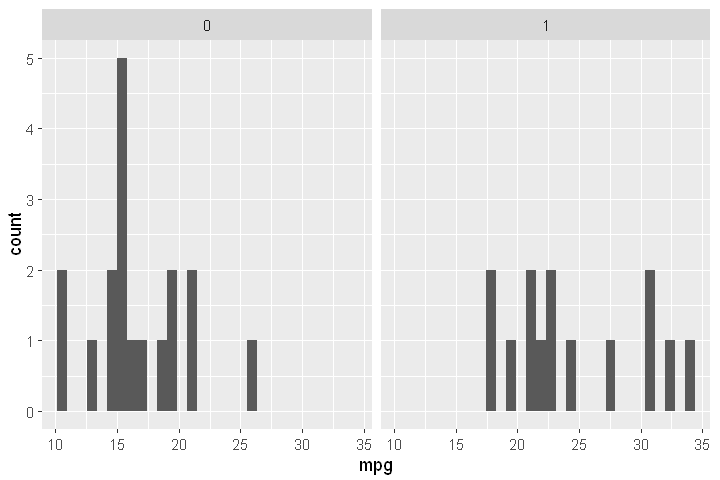

In [15]:
# Create faceted histogram
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram() +
  facet_wrap(~ vs)

### Boxplots and density plots
The mileage of a car tends to be associated with the size of its engine (as measured by the number of cylinders). 

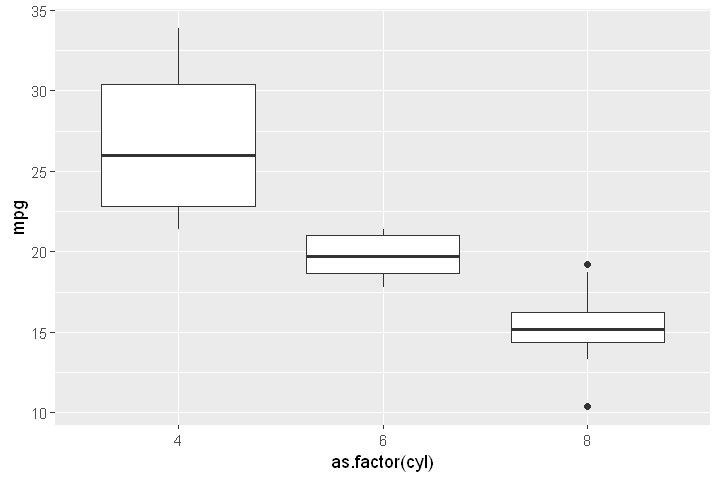

In [16]:
# Create box plots of city mpg by ncyl
ggplot(mtcars, aes(x = as.factor(cyl), y = mpg)) +
  geom_boxplot()

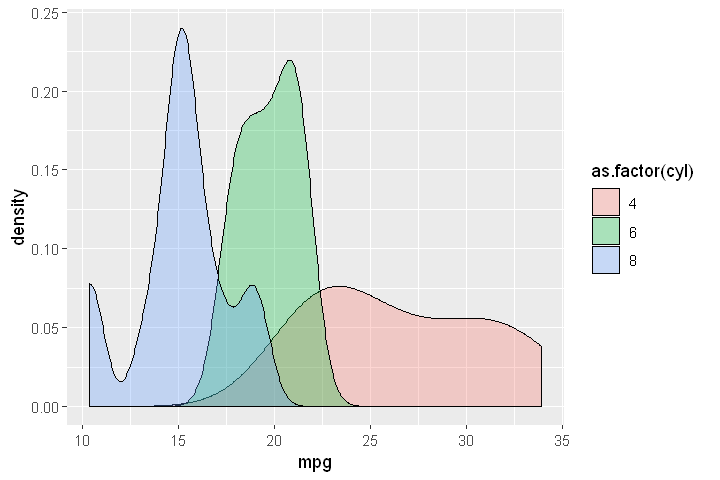

In [17]:
# Create overlaid density plots for same data
ggplot(mtcars, aes(x = mpg, fill = as.factor(cyl))) +
  geom_density(alpha = .3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


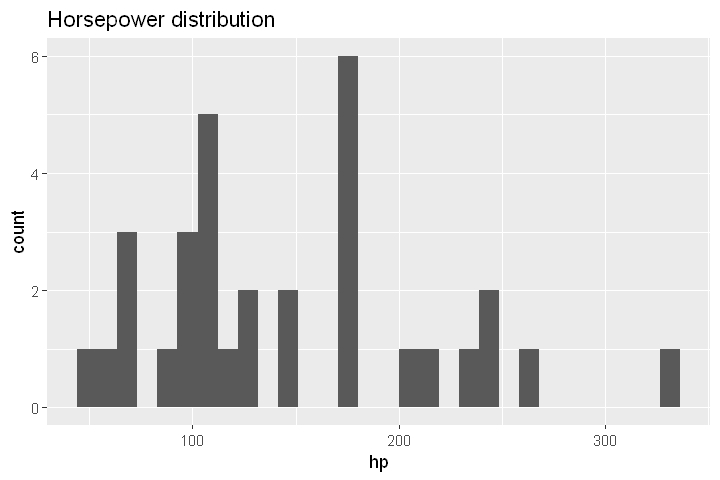

In [18]:
# Create hist of horsepwr
mtcars %>%
  ggplot(aes(hp)) +
  geom_histogram() +
  ggtitle("Horsepower distribution")



### Binwidths
Before you take plots for granted, it's a good idea to see how things change when you alter the binwidth. The binwidth determines how smooth your distribution will appear: the smaller the binwidth, the more jagged your distribution becomes. It's good practice to consider several binwidths in order to detect different types of structure in your data.

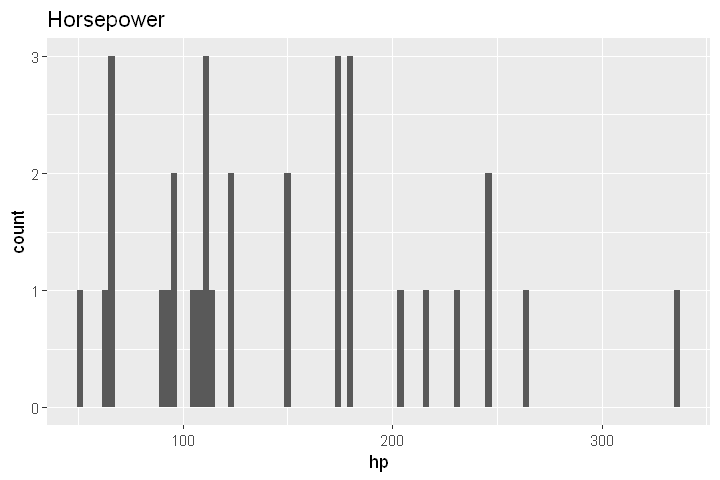

In [19]:
# Create hist of horsepwr with binwidth of 3
mtcars %>%
  ggplot(aes(hp)) +
  geom_histogram(binwidth = 3) +
  ggtitle("Horsepower")

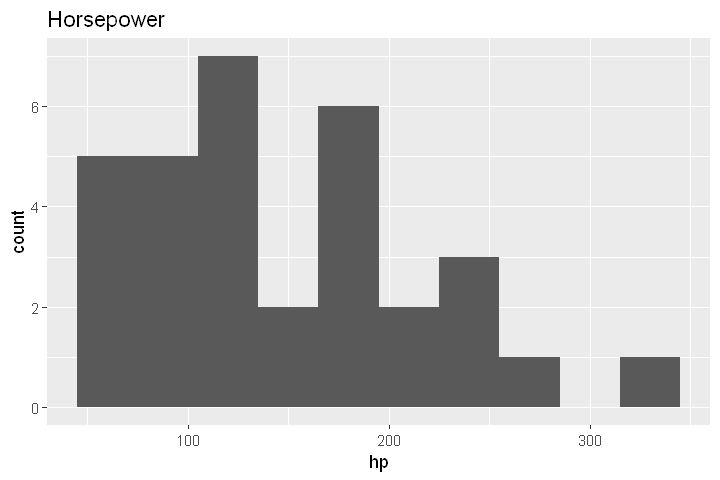

In [20]:
# Create hist of horsepwr with binwidth of 30
mtcars %>%
  ggplot(aes(hp)) +
  geom_histogram(binwidth = 30) +
  ggtitle("Horsepower")

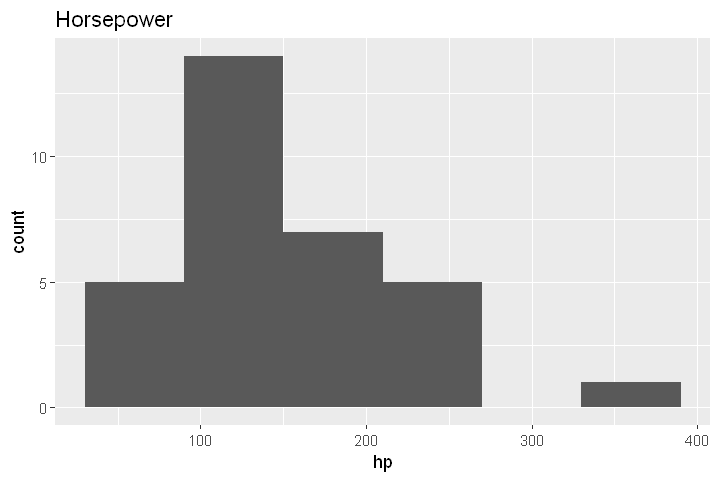

In [21]:
# Create hist of horsepwr with binwidth of 60
mtcars %>%
  ggplot(aes(hp)) +
  geom_histogram(binwidth = 60) +
  ggtitle("Horsepower")

## Boxplots

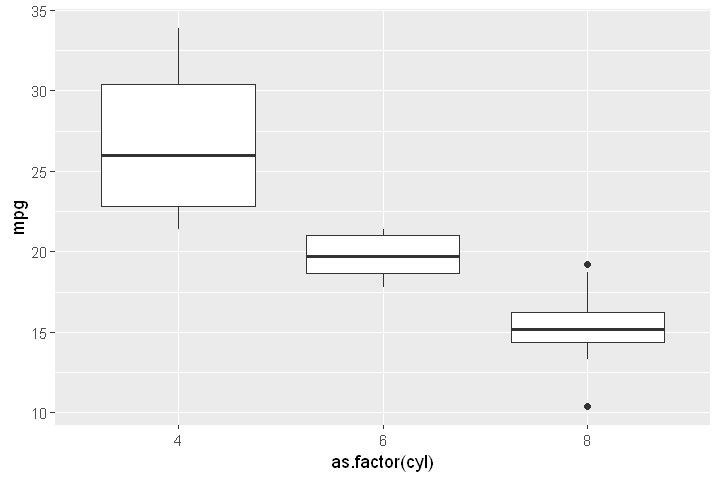

In [22]:
# Create box plots of city mpg by ncyl
ggplot(mtcars, aes(x = as.factor(cyl), y = mpg)) +
  geom_boxplot()

### Three variable plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


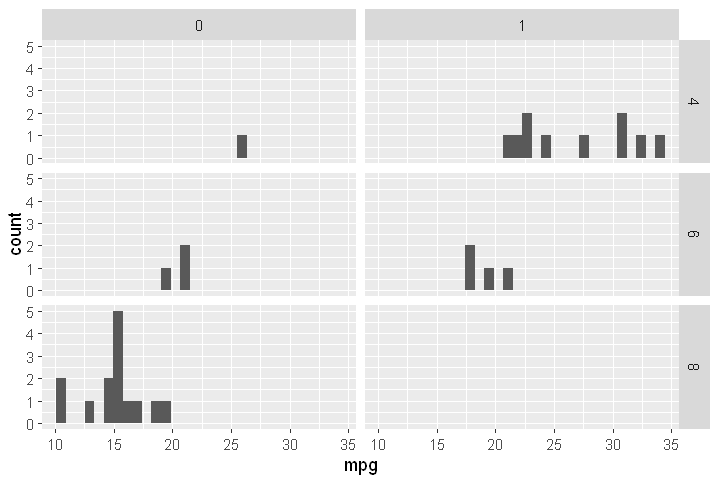

In [23]:
# Facet hists using hwy mileage and ncyl
mtcars %>%
  ggplot(aes(x = mpg)) +
  geom_histogram() +
  facet_grid(cyl ~ vs) 

## Calculate center measures

In [24]:
library(gapminder)

continent,mean(lifeExp),median(lifeExp)
Africa,54.8,52.9
Americas,73.6,72.9
Asia,70.7,72.4
Europe,77.6,78.6
Oceania,80.7,80.7


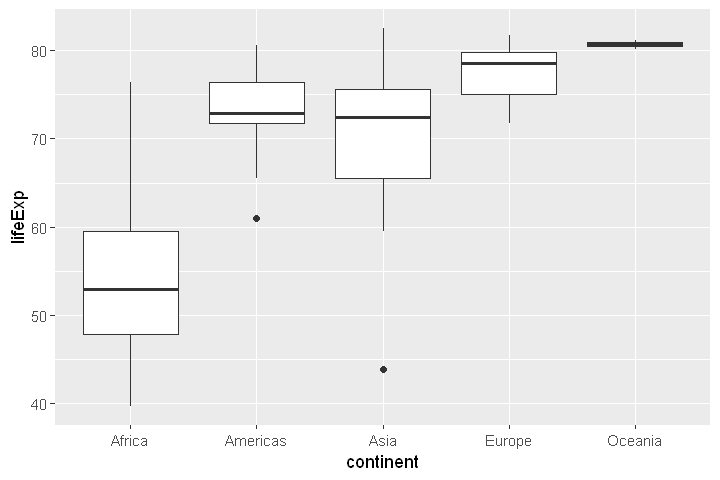

In [25]:
# Create dataset of 2007 data
gap2007 <- filter(gapminder, year == 2007)

# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp),
            median(lifeExp))

# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.631,11.610,52
Americas,4.441,4.632,25
Asia,7.964,10.152,33
Europe,2.980,4.782,30
Oceania,0.729,0.516,2


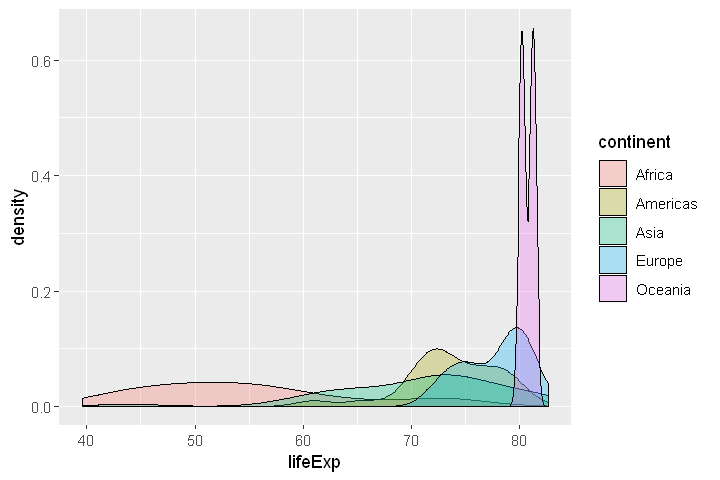

In [26]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

 Like mean and standard deviation, median and IQR measure the central tendency and spread, respectively, but are robust to outliers and non-normal data. 

### Transformations

Highly skewed distributions can make it very difficult to learn anything from a visualization. Transformations can be helpful in revealing the more subtle structure. 

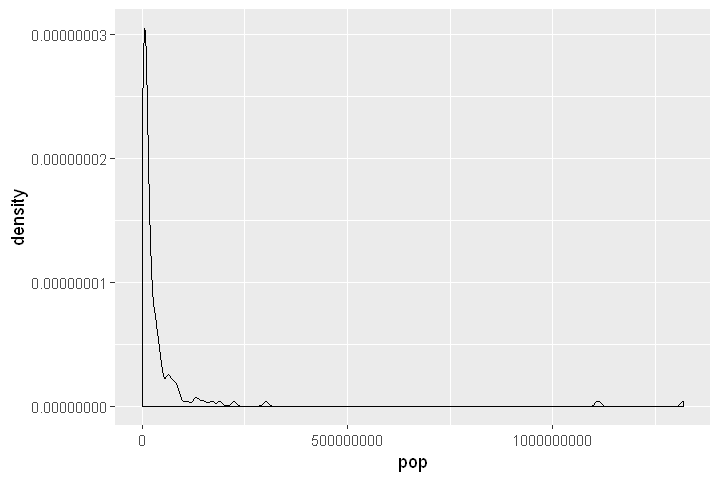

In [27]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

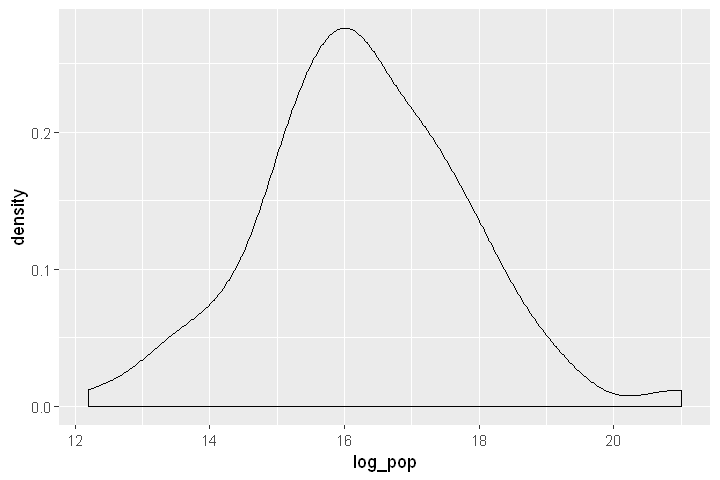

In [28]:
# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()

# Outlier

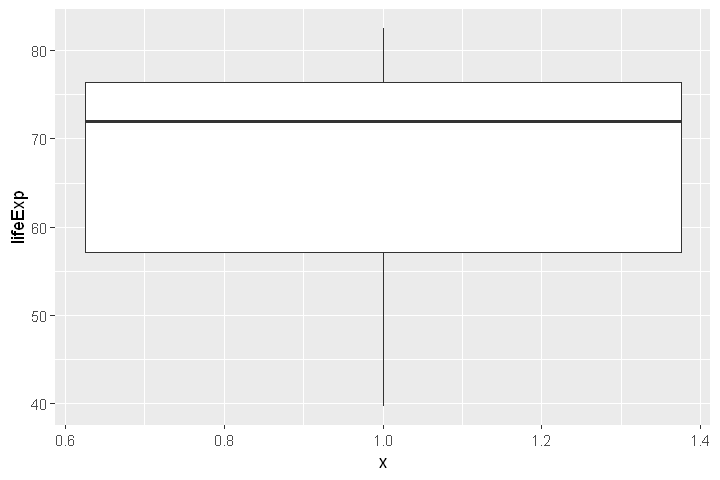

In [29]:
# Remove outliers, create box plot of lifeExp
gap2007 %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()

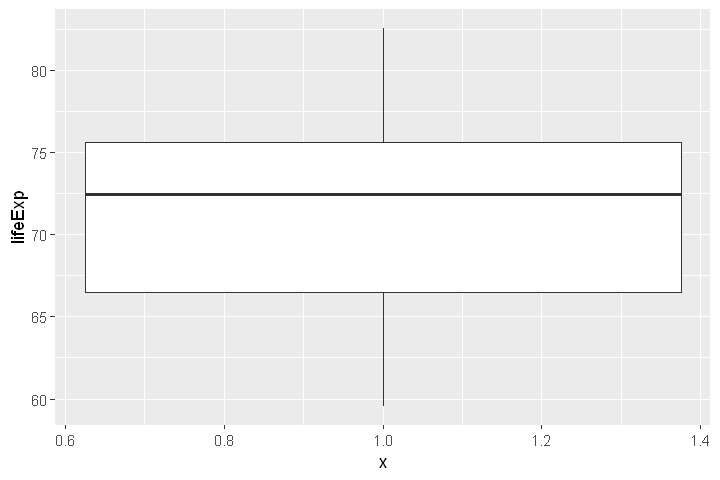

In [30]:
# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
  filter(continent == "Asia") %>%
  mutate(is_outlier = lifeExp < 50)

# Remove outliers, create box plot of lifeExp
gap_asia %>%
  filter(is_outlier == FALSE) %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()

# Case studies United Nations
The votes data set contains the UN General Assambly votes. The UN started voting in 1946. 
<br>Where the vote column is represented the votes:

    1 = Yes
    2 = Abstain
    3 = No
    8 = Not present
    9 = Not a member

The `ccode` are [The Correlates of War project](www.cow.dss.ucdavis.edu/data-sets/cow-country-codes) country codes

In [31]:
votes <- readRDS("votes.Rds")
COW <- read_csv("COWcountrycodes.csv")

Parsed with column specification:
cols(
  StateAbb = col_character(),
  CCode = col_integer(),
  StateNme = col_character()
)


In [32]:
glimpse(votes)
glimpse(COW)

Observations: 508,929
Variables: 4
$ rcid    <dbl> 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,...
$ session <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ vote    <dbl> 1, 1, 9, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 1, 1, 1,...
$ ccode   <int> 2, 20, 31, 40, 41, 42, 51, 52, 53, 54, 55, 56, 57, 58, 60, ...
Observations: 243
Variables: 3
$ StateAbb <chr> "USA", "CAN", "BHM", "CUB", "CUB", "HAI", "HAI", "DOM", "D...
$ CCode    <int> 2, 20, 31, 40, 40, 41, 41, 42, 42, 51, 52, 53, 54, 55, 56,...
$ StateNme <chr> "United States of America", "Canada", "Bahamas", "Cuba", "...


In [33]:
# Filter for votes that are "yes", "abstain", or "no"
votes_processed <- votes %>%  
    filter( vote %in% c(1,2,3)) %>%
    mutate(year = session + 1945, #un started voteing in 1946 therefore you can get year by adding 1945 to the session
          country = countrycode(ccode, "cown", "country.name")) 
    

Warning message in countrycode(ccode, "cown", "country.name"):
"Some values were not matched unambiguously: 260, 816
"

In [34]:
head(filter(COW, CCode == 260),1)
head(filter(COW, CCode == 816),1)

StateAbb,CCode,StateNme
GFR,260,German Federal Republic


StateAbb,CCode,StateNme
DRV,816,Vietnam


In [35]:
# Filter for votes that are "yes", "abstain", or "no"
votes_processed <- votes %>%  
    filter( vote %in% c(1,2,3)) %>%
    mutate(year = session + 1945, #un started voteing in 1946 therefore you can get year by adding 1945 to the session
          country = countrycode(ccode, "cown", "country.name"),
          country = replace(country, ccode == 260, "German Federal Republic"),
          country = replace(country, ccode == 816, "Vietnam")) 

Warning message in countrycode(ccode, "cown", "country.name"):
"Some values were not matched unambiguously: 260, 816
"

In [36]:
# Find total and fraction of "yes" votes
votes_processed %>%
  summarise(total = n(),
            percent_yes = sum(vote == 1)/n())

total,percent_yes
353547,0.8


In [37]:
# Now voes by year
by_year <- votes_processed %>%
              group_by(year) %>%
              summarize(total = n(),
                    percent_yes = mean(vote == 1))
by_year

year,total,percent_yes
1947,2039,0.569
1949,3469,0.438
1951,1434,0.585
1953,1537,0.632
1955,2169,0.695
1957,2708,0.609
1959,4326,0.588
1961,7482,0.573
1963,3308,0.729
1965,4382,0.708


In [38]:
# Summarize by country
by_country <- votes_processed %>%
  group_by(country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))
by_country

country,total,percent_yes
Afghanistan,2373,0.859
Albania,1695,0.717
Algeria,2213,0.899
Andorra,719,0.638
Angola,1431,0.924
Antigua & Barbuda,1302,0.912
Argentina,2553,0.768
Armenia,758,0.747
Australia,2575,0.557
Austria,2389,0.622


In [39]:
# Sort in ascending order of percent_yes
head(by_country %>%
  arrange(percent_yes))

# Now sort in descending order
head(by_country %>%
  arrange(desc(percent_yes)))

country,total,percent_yes
Zanzibar,2,0.000
United States,2568,0.269
Palau,369,0.339
Israel,2380,0.341
German Federal Republic,1075,0.397
United Kingdom,2558,0.417


country,total,percent_yes
São Tomé & Príncipe,1091,0.976
Seychelles,881,0.975
Djibouti,1598,0.961
Guinea-Bissau,1538,0.960
Timor-Leste,326,0.957
Mauritius,1831,0.950


In [40]:
# Filter out countries with fewer than 100 votes
head(by_country %>%
  arrange(percent_yes) %>%
  filter(total >= 100))

country,total,percent_yes
United States,2568,0.269
Palau,369,0.339
Israel,2380,0.341
German Federal Republic,1075,0.397
United Kingdom,2558,0.417
France,2527,0.427


## Visualisation of the data

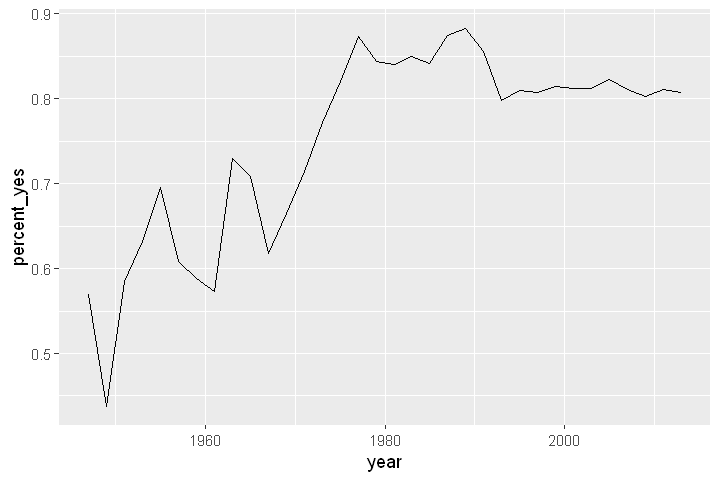

In [41]:
# Create line plot 
ggplot(by_year, aes(x = year, y = percent_yes)) +
  geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


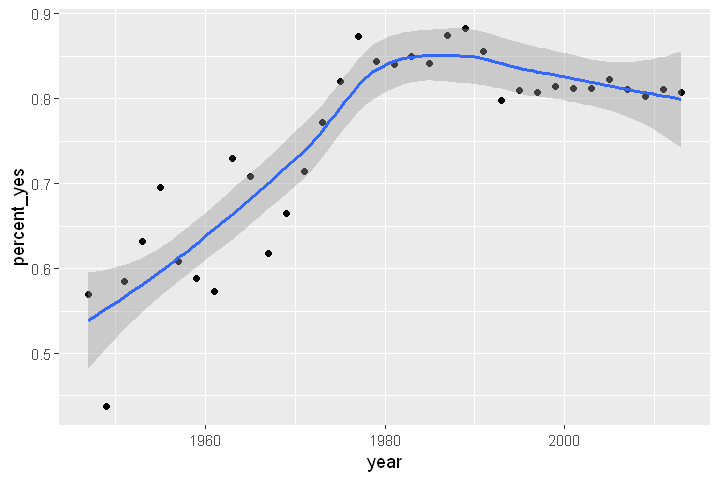

In [42]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point()+
  geom_smooth()

In [43]:
# Group by year and country: by_year_country
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

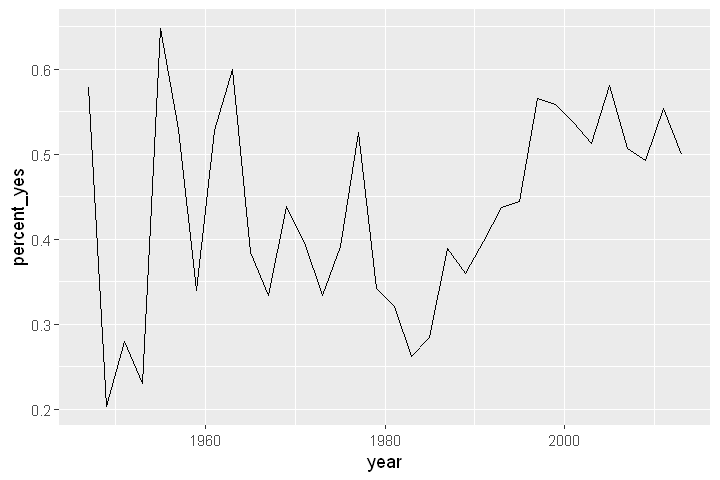

In [44]:
# Create a filtered version: UK_by_year
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom" )

# Line plot of percent_yes over time for UK only
ggplot(UK_by_year, aes(x = year, y = percent_yes)) +
  geom_line()

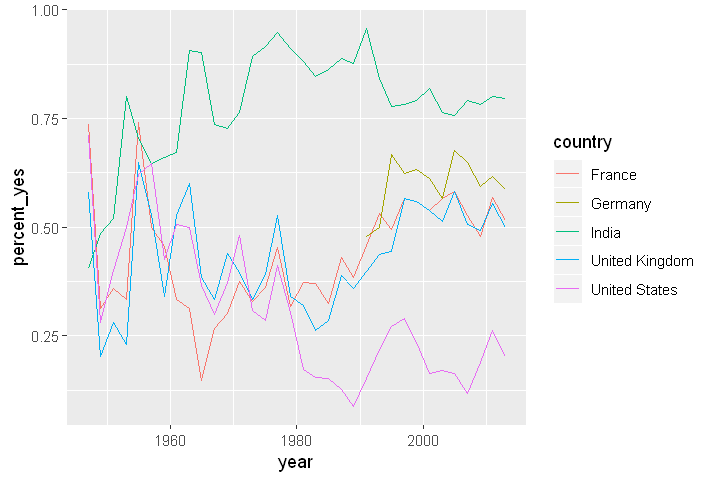

In [45]:
# Vector of four countries to examine
countries <- c("United States", "United Kingdom",
               "France", "India", "Germany")

# Filter by_year_country: filtered_4_countries
filtered_4_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(x = year, y = percent_yes, color = country)) +
  geom_line()

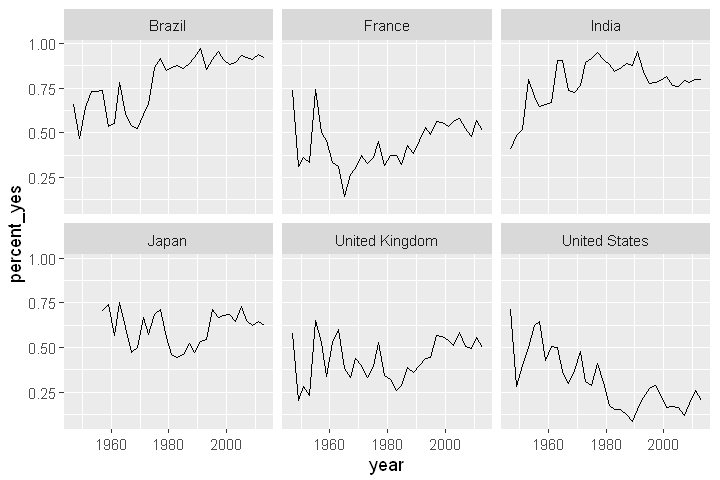

In [46]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries, aes(x = year, y = percent_yes)) +
  geom_line() +
  facet_wrap( ~ country)

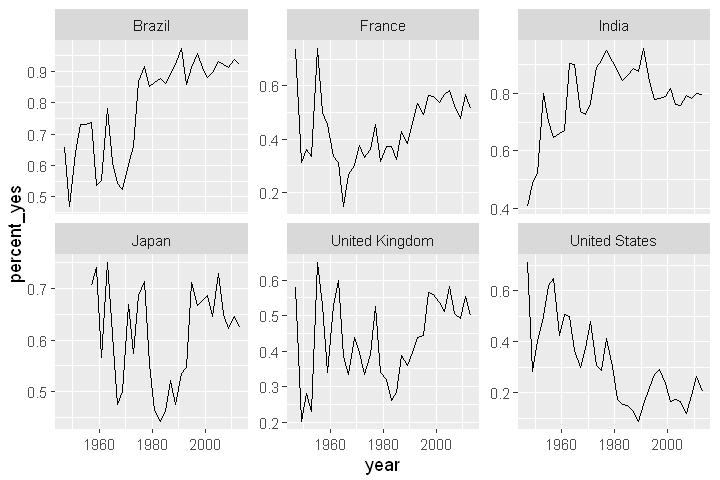

In [47]:
# Line plot of % yes over time faceted by country with independent y axis
ggplot(filtered_6_countries, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ country, scales = "free_y")

In [48]:
# Percentage of yes votes from the US by year: US_by_year
US_by_year <- by_year_country %>%
  filter(country == "United States")

# Perform a linear regression of percent_yes by year: US_fit
US_fit <- lm(percent_yes ~ year, data = US_by_year)

# Perform summary() on the US_fit object
summary(US_fit)



Call:
lm(formula = percent_yes ~ year, data = US_by_year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22249 -0.08064 -0.00866  0.08195  0.19431 

Coefficients:
             Estimate Std. Error t value    Pr(>|t|)    
(Intercept) 12.664146   1.837974    6.89 0.000000085 ***
year        -0.006239   0.000928   -6.72 0.000000137 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.106 on 32 degrees of freedom
Multiple R-squared:  0.585,	Adjusted R-squared:  0.572 
F-statistic: 45.2 on 1 and 32 DF,  p-value: 0.000000137


The estimated slope of this relationship or the estimated change each year of the probability of the US voting "yes" is - 0.006.
<br>In this linear model the p-value of the relationship between year and percent_yes us 0.000000137

In [49]:
library(broom)

In [50]:
tidy(US_fit)

term,estimate,std.error,statistic,p.value
(Intercept),12.66415,1.837974,6.89,0.0000000848
year,-0.00624,0.000928,-6.72,0.0000001367


In [51]:
# Fit model for the United Kingdom
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom")
UK_fit <- lm(percent_yes ~ year, UK_by_year)

# Create US_tidied and UK_tidied
US_tidied <- tidy(US_fit)
UK_tidied <- tidy(UK_fit)

# Combine the two tidied models
bind_rows(US_tidied, UK_tidied)

term,estimate,std.error,statistic,p.value
(Intercept),12.66415,1.837974,6.89,0.0000000848
year,-0.00624,0.000928,-6.72,0.0000001367
(Intercept),-3.26655,1.957774,-1.67,0.1049736038
year,0.00187,0.000989,1.89,0.0677417688


This "nested" data has an interesting structure. The second column, data, is a list, a type of R object that hasn't yet come up in this course that allows complicated objects to be stored within each row. This is because each item of the data column is itself a data frame.

In [52]:
# Load the tidyr package
library(tidyr)
# Nest all columns besides country
nested <- by_year_country %>%
  nest(-country)

In [53]:
# Print the nested data for Brazil
nested$data[[7]]

total,percent_yes
54,0.611
54,0.704
54,0.611
53,0.472
54,0.463
54,0.704
54,0.426
52,0.519
54,0.537
54,0.704


The opposite of the `nest()` operation is the `unnest()` operation. This takes each of the data frames in the list column and brings those rows back to the main data frame.
<br>The `map()` function from purrr works by applying a formula to each item in a list, where `.`represents the individual item. For example, you could add one to each of a list of numbers:

`map(numbers, ~ 1 + .)`


In [54]:
library(purrr)

In [55]:
# Perform a linear regression on each item in the data column
#country_coefficients <- by_year_country %>%
#    nest(-country) %>%
#    mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
#         tidied = map(model, tidy))%>%
#    unnest(tidied)
    

In [56]:
#head(country_coefficients)

In [57]:
# Filter for only the slope terms
# slope_terms <- filter(country_coefficients, term == "year")

Filtering for significant countries

Not all slopes are significant, and you can use the p-value to guess which are and which are not.

However, when you have lots of p-values, like one for each country, you run into the problem of multiple hypothesis testing, where you have to set a stricter threshold. The p.adjust() function is a simple way to correct for this, where p.adjust(p.value) on a vector of p-values returns a set that you can trust.

In [58]:
# Add p.adjusted column, then filter
#filtered_countries <- slope_terms %>%
#  mutate(p.adjusted = p.adjust(p.value))%>%
#  filter(p.adjusted < .05)

In [59]:
# Sort for the countries increasing most quickly
# head(filtered_countries %>% arrange(desc(estimate)))

# Sort for the countries decreasing most quickly
# head(filtered_countries %>% arrange(estimate))

## Joinging another dataset
The description dataset has more information about the votes

There are six columns in the descriptions dataset that describe the topic of a resolution:

    me: Palestinian conflict
    nu: Nuclear weapons and nuclear material
    di: Arms control and disarmament
    hr: Human rights
    co: Colonialism
    ec: Economic development

Each contains a 1 if the resolution is related to this topic and a 0 otherwise.

In [61]:
description <- readRDS("descriptions.Rds")

In [63]:
head(description)
head(votes_processed)

rcid,session,date,unres,me,nu,di,hr,co,ec
46,2,1947-09-04,R/2/299,0,0,0,0,0,0
47,2,1947-10-05,R/2/355,0,0,0,1,0,0
48,2,1947-10-06,R/2/461,0,0,0,0,0,0
49,2,1947-10-06,R/2/463,0,0,0,0,0,0
50,2,1947-10-06,R/2/465,0,0,0,0,0,0
51,2,1947-10-02,R/2/561,0,0,0,0,1,0


rcid,session,vote,ccode,year,country
46,2,1,2,1947,United States
46,2,1,20,1947,Canada
46,2,1,40,1947,Cuba
46,2,1,41,1947,Haiti
46,2,1,42,1947,Dominican Republic
46,2,1,70,1947,Mexico


In [65]:
# Join them together based on the "rcid" and "session" columns
votes_joined <- votes_processed %>%
  inner_join(description, by = c("rcid", "session"))

Warning message:
"Column `rcid` has different attributes on LHS and RHS of join"Warning message:
"Column `session` has different attributes on LHS and RHS of join"

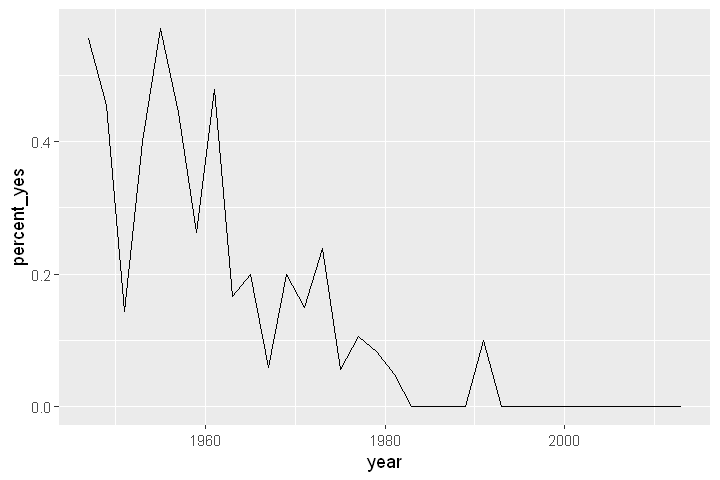

In [66]:
# Filter, then summarize by year: US_co_by_year
US_co_by_year <- votes_joined %>%
  filter(country == "United States" & co == 1) %>%
  group_by(year) %>%
  summarise(percent_yes = mean(vote == 1))

# Graph the % of "yes" votes over time
ggplot(US_co_by_year, aes(x = year, y = percent_yes)) +
  geom_line()

In [67]:
# Perform gather again, then filter 
votes_gathered <- votes_joined %>%
  gather(key = topic, value = has_topic, me:ec) %>%
  filter(has_topic == 1)

In [68]:
head(votes_gathered)

rcid,session,vote,ccode,year,country,date,unres,topic,has_topic
77,2,1,2,1947,United States,1947-11-06,R/2/1424,me,1
77,2,1,20,1947,Canada,1947-11-06,R/2/1424,me,1
77,2,3,40,1947,Cuba,1947-11-06,R/2/1424,me,1
77,2,1,41,1947,Haiti,1947-11-06,R/2/1424,me,1
77,2,1,42,1947,Dominican Republic,1947-11-06,R/2/1424,me,1
77,2,2,70,1947,Mexico,1947-11-06,R/2/1424,me,1


In [69]:
# Replace the two-letter codes in topic: votes_tidied
votes_tidied <- votes_gathered %>%
  mutate(topic = recode(topic,
                        me = "Palestinian conflict",
                        nu = "Nuclear weapons and nuclear material",
                        di = "Arms control and disarmament",
                        hr = "Human rights",
                        co = "Colonialism",
                        ec = "Economic development"))

In [70]:
# Summarize the percentage "yes" per country-year-topic
by_country_year_topic <- votes_tidied %>%
  group_by(country, year, topic) %>%
summarise(total = n(),
  percent_yes = mean(vote == 1)) %>%
  ungroup()

In [71]:
head(by_country_year_topic)

country,year,topic,total,percent_yes
Afghanistan,1947,Colonialism,8,0.500
Afghanistan,1947,Economic development,1,0.000
Afghanistan,1947,Human rights,1,0.000
Afghanistan,1947,Palestinian conflict,6,0.000
Afghanistan,1949,Arms control and disarmament,3,0.000
Afghanistan,1949,Colonialism,22,0.864


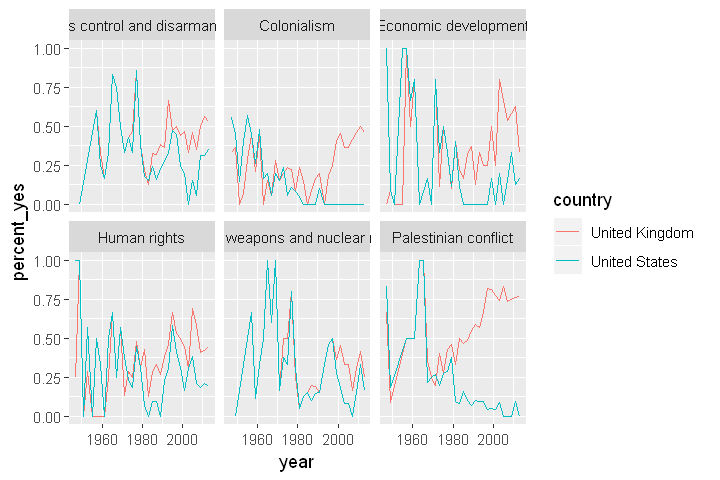

In [73]:
# Filter by_country_year_topic for just the US
US_by_country_year_topic <- by_country_year_topic %>%
  filter(country == "United States" | country == "United Kingdom")

# Plot % yes over time for the US, faceting by topic
ggplot(US_by_country_year_topic, aes(x = year, y = percent_yes, color = country)) +
  geom_line() +
  facet_wrap( ~ topic)


In [ ]:
# Fit model on the by_country_year_topic dataset
country_topic_coefficients <- by_country_year_topic %>%
  nest(-country, - topic) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
    tidied = map(model, tidy)) %>%
  unnest(tidied)

# Print country_topic_coefficients
head(country_topic_coefficients)

In [ ]:
# Create country_topic_filtered
country_topic_filtered <- country_topic_coefficients %>% 
  filter(term == "year") %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

In [ ]:
head(arrange(country_topic_filtered, estimate))

In [ ]:
# Create vanuatu_by_country_year_topic
vanuatu_by_country_year_topic <- by_country_year_topic %>%
  filter(country == "Vanuatu")

# Plot of percentage "yes" over time, faceted by topic
ggplot(vanuatu_by_country_year_topic, aes(x = year, y = percent_yes)) +
  geom_line() +
  facet_wrap( ~ topic)